In [2]:
# Gold heater on a silicon substrate for isotropic films

In [1]:
# Load modules
include("ThreeOmegaMethod.jl")
using Main.ThreeOmegaMethod
using PyPlot

In [2]:
### Input data
# half-width of heater line [m]
b = (12.5/2)*1e-6
# length of heater line [m]
l = 1.0e-3
# range of frequencies [Hz]
f = exp10.(LinRange(0, 9, 1500))
# power [W]
p = 0.030^2*22.11
# heater thermal resistance
ρh = [0. 0.] # I only need two actually, see F
# interface thermal resistances
thresistances = [0.];

In [3]:
# Wrap them into structures
heater = Layer(310.0, 1.0, 0.2e-6, 2.441e6)
substrate = Layer(160.0, 1.0, 525.0e-6, 2320*700.)
layers = [heater substrate]
hgeometry = HeaterGeometry(b, l, ρh)
source = Source(p, f);

In [4]:
# call the model
ΔT, int_error = ThreeOmegaMatrix(layers, hgeometry, source, thresistances);

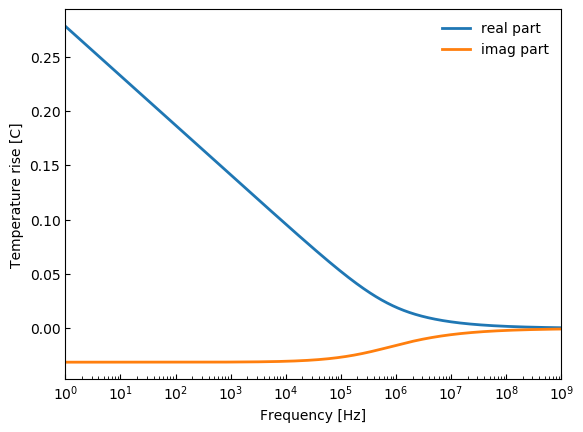

(1, 1.0e9)

In [5]:
figure()
semilogx(f, real(ΔT), label="real part")
semilogx(f, imag(ΔT), label="imag part")
legend(loc="best")
xlabel("Frequency [Hz]")
ylabel("Temperature rise [C]")
xlim(1,1e9)